<a href="https://colab.research.google.com/github/jisukjs03258/Data-analysis-ECON/blob/final/(1)10_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA (Exploratory Data Analysis)

1. 문제를 인식
  - ex) 보험료가 바르게 책정되고 있는지를 확인

2. 변수 설명
3. 데이터에 대한 이해



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
sns.set_style("whitegrid") #옵션임 안해두돼

In [ ]:
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [ ]:
df=pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- bmi : body mass index
- charges : 개인의 의료 비용 (의료 보험회사에서 청구하는)

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.shape #row-1338,column-7

(1338, 7)

In [ ]:
df.columns #변수

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.describe() #수치형 데이터가 계산되어 나옴 <-> 범주형데이터(글자)
#보고서 과제를 할때, 이걸 활용

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include="O") #범주형 데이터를 구해줘!
                         #unique : 데이터의 종류
                         #대문자 O(오)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


- 범주형 데이터(strings)
  - top : 가장 많이 나오는 유형
  - freq : 가장 많이 나오는 유형에 대한 빈도

- Results
  - 성별중에서 가장 많이 도출되는 유형은 male
    - male은 676번 도출됨
  - southeast지역이 가장 많이 도출됨
    - southeast는 364번 도출됨
  - 대부분의 사람들은 비흡연자
    - 1338중에서 1064명이 nonsmoker

In [ ]:
df["sex"].unique() # unique 값 확인

array(['female', 'male'], dtype=object)

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### 4. Data Cleaning

  (1) missing value

  (2) 중복 데이터 확인

In [ ]:
df.isnull() #true-결측치 / false-채워진 값

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #true-1,false-0으로 가정해 더해라!

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info() #결측치는 아니지만, "? 같은 object가 수치형에 있는지를 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.duplicated() #중복 데이터 확인! - true(중복값있음)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [ ]:
df.duplicated().sum() #1개의 중복값이 있다는 것

1

In [ ]:
df[df.duplicated()] #중복값 찾는 명령

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(keep="first",inplace=True) #1번째 값은 냅두고, 두번째 값은 영구히(inplace) drop하겠다

- drop_duplicates 메소드 사용하여 중복된 행 제거

- keep="first"
  - 중복값 2개 중 첫번째 것은 남겨둠

- inplace=True
  - 영구히 데이터 변경

In [ ]:
df.duplicated().sum() #inplace가 반영되어 중복값이 없어짐

0

### 5. 데이터 시각화

####5.1 개별 변수 분석

  - 각 변수별 분포 분석
    - 기초통계량
    - 분포도
    - 차트(boxplot, histogram, barplot, piechart)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- 변수 charges

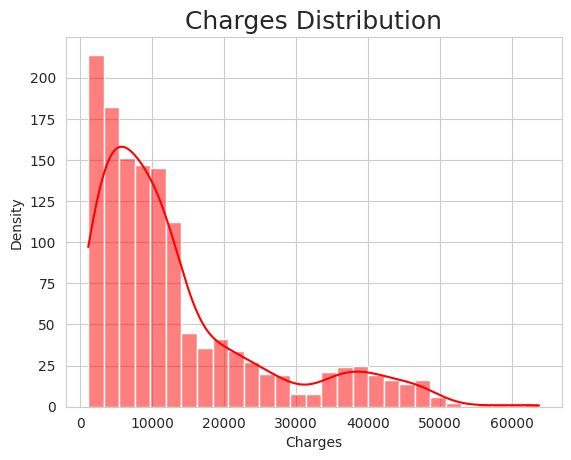

In [ ]:
sns.histplot(df["charges"], color="r",kde=True) # 맨 처음에 whitegrid 스타일을 적용해서 격자무늬가 생긴 것
plt.title("Charges Distribution", size=18)      # kde : 밀도선을 그려줌
plt.xlabel("Charges")
plt.ylabel("Density")
plt.show()

- "charges":
  - right skewed (positive skewed)

- 왜도(skewness)
  - 3차 모먼트

$$ \gamma_1=E[(\frac{x-\mu}{\sigma})^3]$$
(식은 시험에 안나옴)

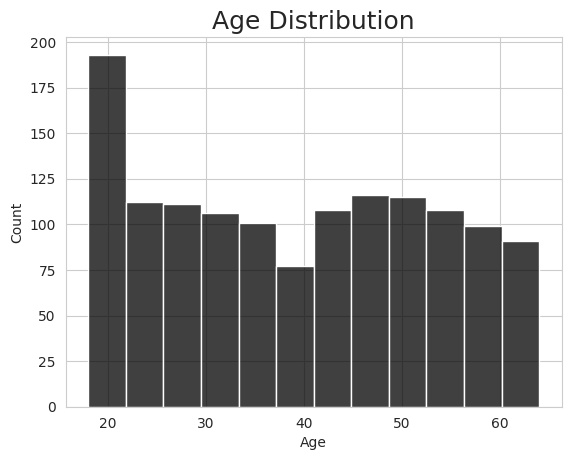

In [ ]:
sns.histplot(df["age"], color="k")
plt.title("Age Distribution", size=18)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- 의료보험 고객 중 가장 빈번한 나이대는 18-19세임
- 분포는 uniform distribution 형태처럼 나타남

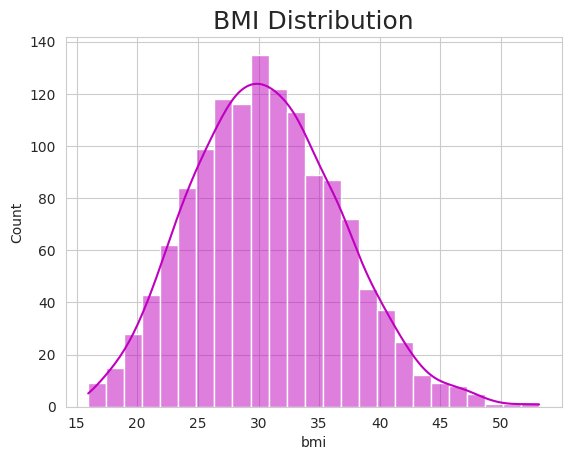

In [ ]:
sns.histplot(df["bmi"], color="m", kde=True)
plt.title("BMI Distribution", size=18)
plt.show()

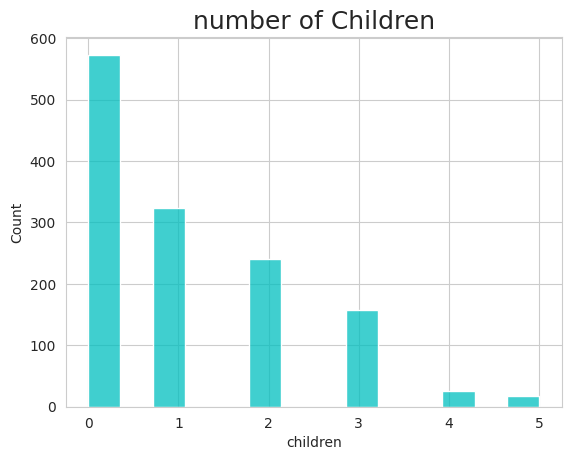

In [ ]:
sns.histplot(df["children"], color="c")
plt.title("number of Children", size=18)
plt.show()

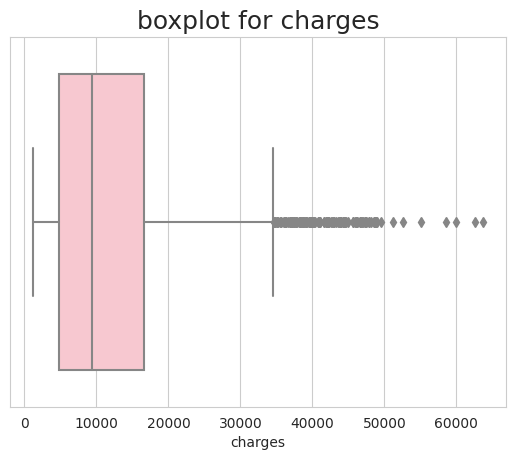

In [ ]:
sns.boxplot(data=df, x="charges", color="pink")
plt.title("boxplot for charges", size=18)
plt.show()

In [ ]:
q1_charges=df["charges"].quantile(0.25)
q3_charges=df["charges"].quantile(0.75)
iqr_charges=q3_charges-q1_charges

In [ ]:
print(iqr_charges)

11911.37345


In [ ]:
ll=q1_charges-1.5*iqr_charges
ul=q3_charges+1.5*iqr_charges

In [ ]:
df[(df["charges"]<ll)|(df["charges"]>ul)] # 대괄호[]안에 해당하는 것들을 df형식으로 나타내줘!
                                          # 여기서 outlier는 139개라는 것

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


### Categorical Features (범주형 데이터)

gender

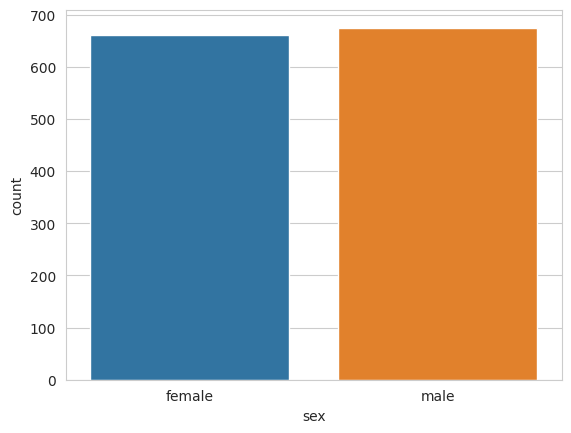

In [ ]:
sns.countplot(x="sex",data=df)
plt.show()

children

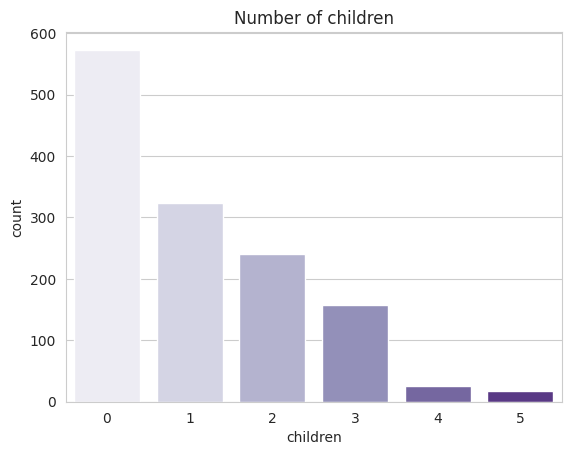

In [ ]:
sns.countplot(x="children", data=df, palette="Purples") #범주형 데이터는 아니지만 countplot으로 보는 게 적합함
plt.title("Number of children")
plt.xlabel("children")
plt.ylabel("count")
plt.show()

smoker

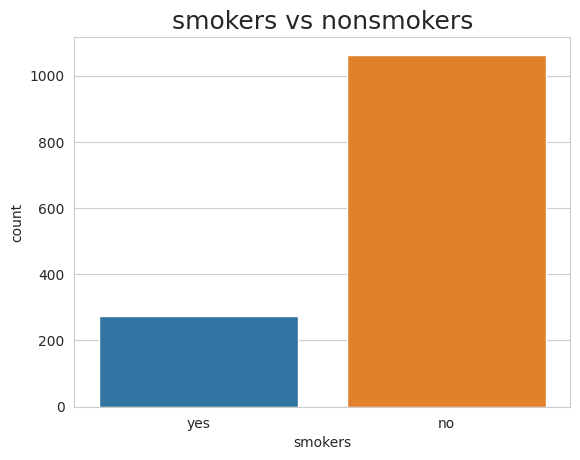

In [ ]:
sns.countplot(x="smoker", data=df)
plt.title("smokers vs nonsmokers", size=18)
plt.xlabel("smokers")
plt.ylabel("count")
plt.show()

In [ ]:
df["smoker"].value_counts() #df.value_counts() : 카운팅 해줌

no     1063
yes     274
Name: smoker, dtype: int64

region

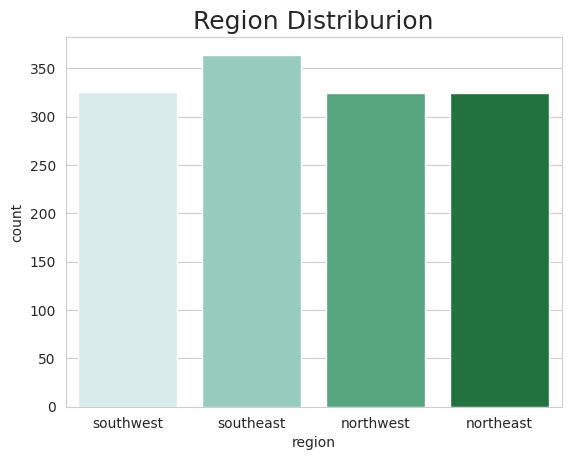

In [ ]:
sns.countplot(x="region", data=df, palette="BuGn")
plt.title("Region Distriburion", size=18)
plt.xlabel("region")
plt.ylabel("count")
plt.show()

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

### Bivariate Analysis

- 두 변수를 함께 분석하는 것을 의미함
- 두 변수간의 관계를 파악하는 것이 목적임

  - boxplot etc

**Age vs Charges** 둘다 수치형인 경우

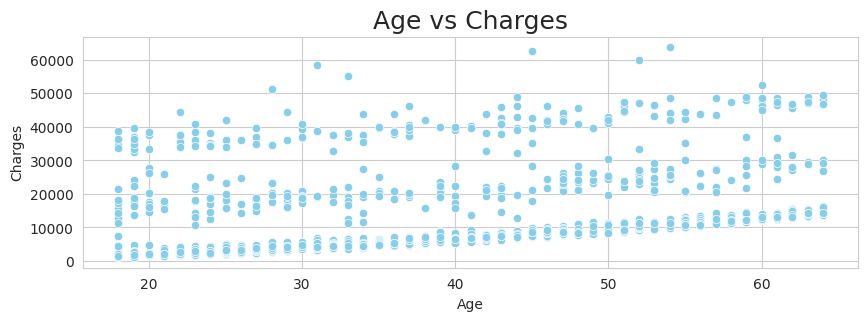

In [ ]:
plt.figure(figsize=(10,3))
sns.scatterplot(x="age", y="charges", color="skyblue", data=df)
plt.title("Age vs Charges", size=18)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [ ]:
df.corr(numeric_only=True)["age"]["charges"] #둘의 상관관계 알아보기 / corr괄호 안에 numeric_only=True 쓰면 자잘한 거 없이 값만 나옴!

0.2983082125097863

**smoker vs charges** 범주형과 수치형 둘 다 있는 경우

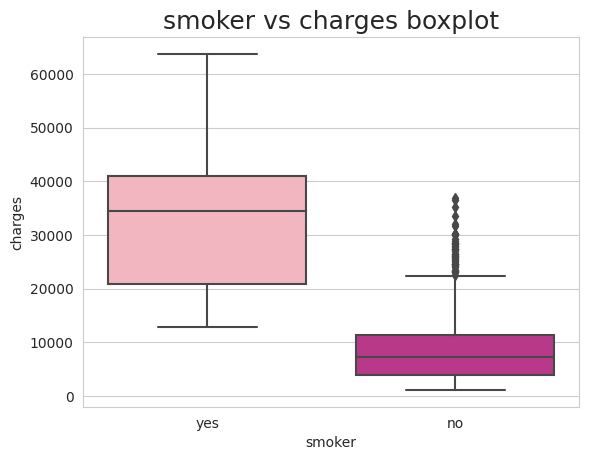

In [ ]:
sns.boxplot(data=df, x="smoker", y="charges", palette="RdPu")
plt.title("smoker vs charges boxplot", size=18)
plt.show()

#### Pairplot (수치형 데이터)
- 두개의 수치형 데이터의 관계를 보여주는 시각화 그래프

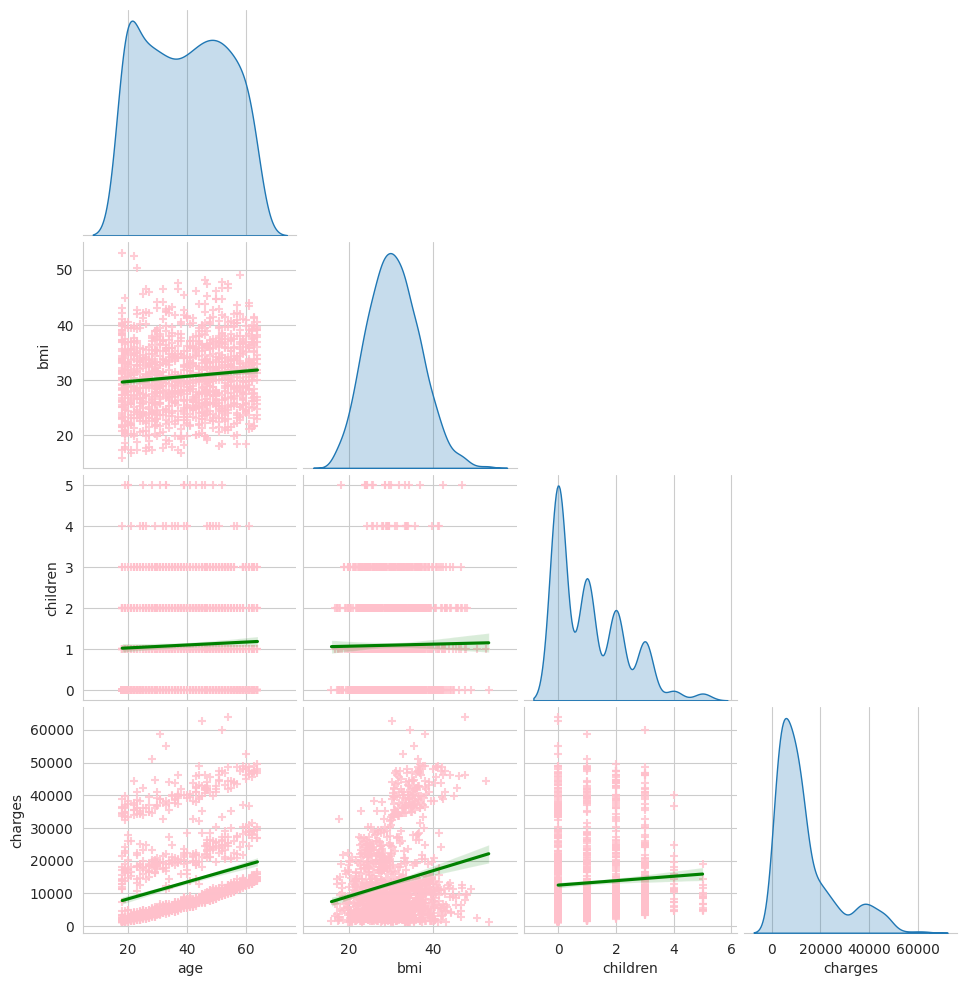

In [ ]:
sns.pairplot(df, diag_kind="kde", kind="reg", markers="+", plot_kws={"line_kws":{"color":"g"}, "scatter_kws":{"color":"pink"}}, corner=True) #일일이 구하지 않아도 matrix form으로 보여줌
#하나씩 넣어보면서 만들어 본 것 / 학습할 땐 df만 넣었다가 하나씩 추가해보기
plt.show()

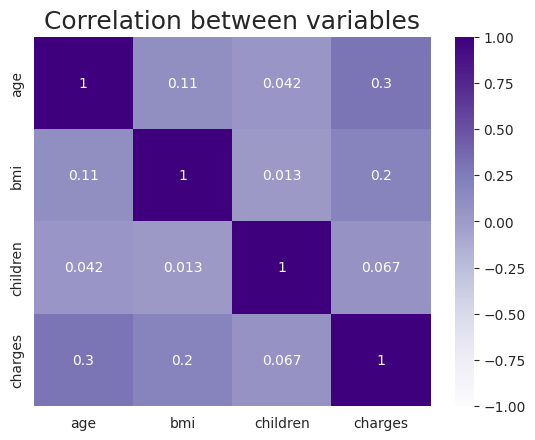

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Purples", vmax=1, vmin=-1) #annot=가운데 숫자
plt.title("Correlation between variables", size=18)
plt.show()